# Modelling Objective

- Perform employee segmentation and find out what are the different characteristics of each cluster of employees 
- Strategise a plan to retain the most vulnerable group of employees 

# Background Research

![alt text](https://images.unsplash.com/photo-1504384308090-c894fdcc538d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80 "Employee Segmentation")

Why is analysing employee resignation important?

Employee resignation is something that can be very detrimental to a company.

Having a high employee resignation rate can lead to the following negative impacts: 
> 1. Lowers the morale of the employees working in the company. For example, a colleague losing a friend at work who they always hang out with or talk to which might not seem like anything, but it can ruin the culture of working in that company for that employee.

> 2. Low-efficiency at work. This is simply because there are less employees, but there is still the same amount of work to get done.

> 3. The cost replacing an employee who resigns is high.

These are just few of the many reasons of why having a high resignation rate should be avoided. Hence, it is important to analyse the factor that drives these employees to turn to resignation and offer a reasonable solution for them to stay in the company.
___

How can clustering help the problem of employee resignation?
> Using clustering, we will be able to identify the characteristics of employees who tend to resign and provide solutions/recommendations to them to keep employee retention high based on their characteristics.

What are the benefits from the analysis after clustering?
> The very obvious benefit as mentioned earlier will be having a higher employee retention rate as employee retention nowadays are of exceeding importance to most organisations due to the effort and cost it will take to replace an employee.

> Some costs include recruitment costs, onboarding costs and training costs.

> An example would be that the US Department of Labour estimated that it costs <b>a third</b> of the new recruit's annual salary to cover the expense of training costs and other factors for replacing an experienced employee. So, by clustering the data that we have, we can manage to identify the problems employees who want to resign have and offer them a better solution to avoid the problem of employee resignation.

# Import modules

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import itertools
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
from tqdm import tqdm

sns.set()
plt.rcParams['figure.figsize'] = (20, 8)

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Dimension reduction for visualization of clusters
# pip install prince
from prince import FAMD

# For modelling
# pip install gower
from gower import gower_matrix
from scipy.cluster.hierarchy import dendrogram

# Models
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, DBSCAN, OPTICS
# pip install kmodes
from kmodes.kprototypes import KPrototypes

# Evaluation metrics
from sklearn.metrics import silhouette_samples, silhouette_score

<b>Reading the dataset</b>

In [2]:
df = pd.read_csv('Company_Employee.csv')
df

Age  Gender     BusinessTravel            Job Function  \
0      41  Female      Travel_Rarely                   Sales   
1      49    Male  Travel_Frequently  Research & Development   
2      37    Male      Travel_Rarely  Research & Development   
3      33  Female  Travel_Frequently  Research & Development   
4      27    Male      Travel_Rarely  Research & Development   
...   ...     ...                ...                     ...   
1465   36    Male  Travel_Frequently  Research & Development   
1466   39    Male      Travel_Rarely  Research & Development   
1467   27    Male      Travel_Rarely  Research & Development   
1468   49    Male  Travel_Frequently                   Sales   
1469   34    Male      Travel_Rarely  Research & Development   

      Distance Between Company and Home (KM)  \
0                                          1   
1                                          8   
2                                          2   
3                                          3   
4                                          2   
...                                      ...   
1465                                      23   
1466                                       6   
1467                                       4   
1468                                       2   
1469                                       8   

      Education (1 is lowest, 5 is highest)  \
0                                         2   
1                                         1   
2                                         2   
3                                         4   
4                                         1   
...                                     ...   
1465                                      2   
1466                                      1   
1467                                      3   
1468                                      3   
1469                                      3   

      Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                                4        Single        5993   
1                                                2       Married        5130   
2                                                3        Single        2090   
3                                                3       Married        2909   
4                                                2       Married        3468   
...                                            ...           ...         ...   
1465                                             4       Married        2571   
1466                                             1       Married        9991   
1467                                             2       Married        6142   
1468                                             2       Married        5390   
1469                                             3       Married        4404   

      Performance Rating (1 is lowest, 4 is highest)  \
0                                                  3   
1                                                  4   
2                                                  3   
3                                                  3   
4                                                  3   
...                                              ...   
1465                                               3   
1466                                               3   
1467                                               4   
1468                                               3   
1469                                               3   

      Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                             1                          6   
1                                             3                         10   
2                                             3                          0   
3                                             3                          8   
4                                             3                        

From a first glance at the dataset, we notice that there are both numerical and categorical columns in our dataset. Lets perform further analysis of the data to understand it better.

# Exploratory Data Analysis

In [3]:
# Create a copy of the original dataframe for EDA
dfEDA = df.copy()

In [4]:
# Renaming the columns for better readability and accessibility
dfEDA.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance (KM)', 'Education', 'Job Satisfaction', 'Marital Status', 
                 'Salary ($)', 'Performance', 'Work Life Balance', 'Service (yrs)', 'Resign Status']

df.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance (KM)', 'Education', 'Job Satisfaction', 'Marital Status', 
                 'Salary ($)', 'Performance', 'Work Life Balance', 'Service (yrs)', 'Resign Status']

We can see that our data has 1470 rows and 13 columns, of which 8 are numerical columns while 5 are categorical columns.

In [5]:
dfEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1470 non-null   int64 
 1   Gender             1470 non-null   object
 2   Business Travel    1470 non-null   object
 3   Job Function       1470 non-null   object
 4   Distance (KM)      1470 non-null   int64 
 5   Education          1470 non-null   int64 
 6   Job Satisfaction   1470 non-null   int64 
 7   Marital Status     1470 non-null   object
 8   Salary ($)         1470 non-null   int64 
 9   Performance        1470 non-null   int64 
 10  Work Life Balance  1470 non-null   int64 
 11  Service (yrs)      1470 non-null   int64 
 12  Resign Status      1470 non-null   object
dtypes: int64(8), object(5)
memory usage: 149.4+ KB


We can also see that our dataset has no null values.

In [6]:
dfEDA.isna().sum()

Age                  0
Gender               0
Business Travel      0
Job Function         0
Distance (KM)        0
Education            0
Job Satisfaction     0
Marital Status       0
Salary ($)           0
Performance          0
Work Life Balance    0
Service (yrs)        0
Resign Status        0
dtype: int64

From the number of unique values of each column, we can see that the categorical columns do not have a large amount of unique values, which is a good thing as we do not have to worry about <u>high cardinality</u> which could cause the `'Curse of Dimensionality'` when if we have to encode the categorical features later.

In [7]:
dfEDA.nunique()

Age                    43
Gender                  2
Business Travel         3
Job Function            3
Distance (KM)          29
Education               5
Job Satisfaction        4
Marital Status          3
Salary ($)           1349
Performance             2
Work Life Balance       4
Service (yrs)          37
Resign Status           2
dtype: int64

From the descriptive summary of the numerical features, we caan see that for both `Salary ($)` and `Service (yrs)`, the maximum values are well over the values of the 75th percentile which would mean that there could be outliers in those features.

In [8]:
dfEDA.describe()

Age  Distance (KM)    Education  Job Satisfaction  \
count  1470.000000    1470.000000  1470.000000       1470.000000   
mean     36.923810       9.192517     2.912925          2.728571   
std       9.135373       8.106864     1.024165          1.102846   
min      18.000000       1.000000     1.000000          1.000000   
25%      30.000000       2.000000     2.000000          2.000000   
50%      36.000000       7.000000     3.000000          3.000000   
75%      43.000000      14.000000     4.000000          4.000000   
max      60.000000      29.000000     5.000000          4.000000   

         Salary ($)  Performance  Work Life Balance  Service (yrs)  
count   1470.000000  1470.000000        1470.000000    1470.000000  
mean    6502.931293     3.153741           2.761224       7.008163  
std     4707.956783     0.360824           0.706476       6.126525  
min     1009.000000     3.000000           1.000000       0.000000  
25%     2911.000000     3.000000           2.000000       3.000000  
50%     4919.000000     3.000000           3.000000       5.000000  
75%     8379.000000     3.000000           3.000000       9.000000  
max    19999.000000     4.000000           4.000000      40.000000

What can we observe from the boxplots?
- Age and Distance (KM) do not have any outliers 
- Service (yrs) and Salary ($) indeed do have outliers
- Outliers indicate that the data under Service (yrs) and Salary ($) are positively-skewed

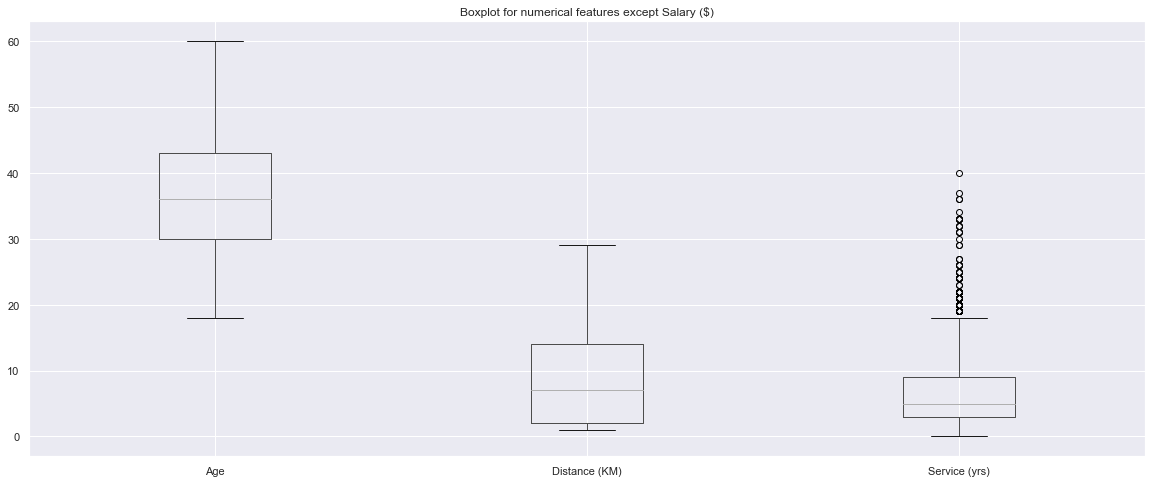

In [9]:
dfEDA.loc[:,['Age', 'Distance (KM)', 'Service (yrs)']].boxplot()
plt.title('Boxplot for numerical features except Salary ($)')
plt.show()

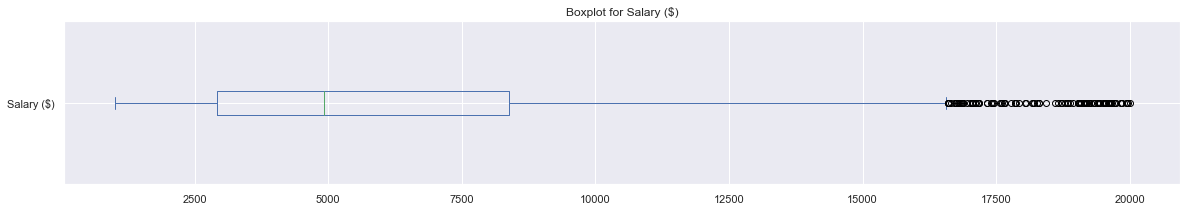

In [10]:
plt.figure(figsize=(20,3))
dfEDA['Salary ($)'].plot.box(vert=False)
plt.title('Boxplot for Salary ($)')
plt.show()

What can we say about the categorical features represented in numerical form?

- Most employees have an average education level as the mode is 3 
- Most employees are satisfied with their job as the mode is 4 
- As for performance, most employees have an average work performance aas the mode is 3 
- Most of the employees think that they have an acceptable work-life balance as the mode is 3

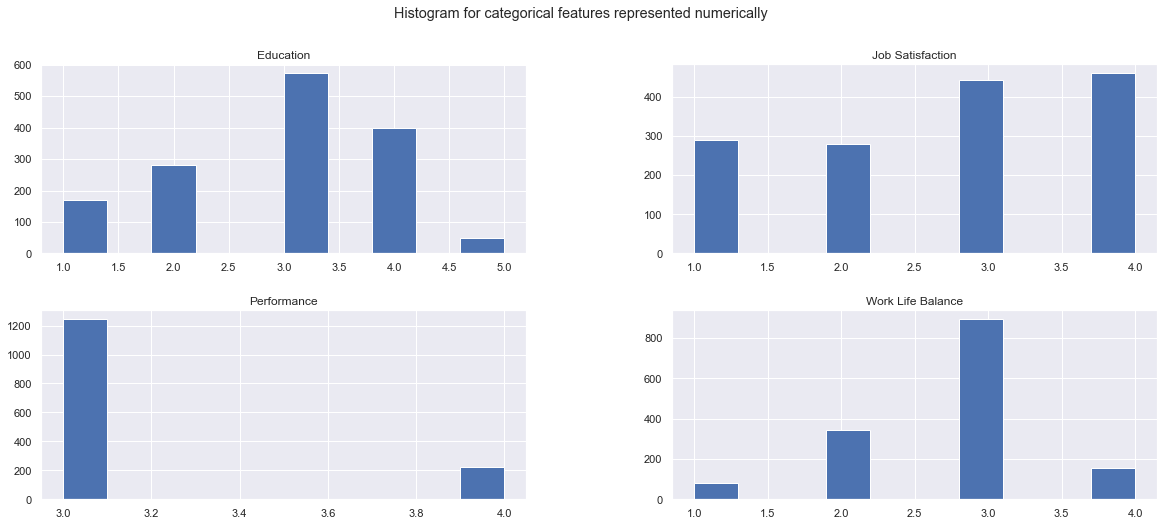

In [11]:
dfEDA[['Education', 'Job Satisfaction', 'Performance', 'Work Life Balance']].hist()
plt.suptitle('Histogram for categorical features represented numerically')
plt.show()

What can we say about the rest of the categorical features?

- Most of the employees are Male with a count of 882 while there are 588 female employees 
- 1043 employees have a job role that requires them to travel rarely while the minority have to travel frequently or do not have to travel at all 
- The Research & Development is the largest department with 961 employees in that department while there are only 446 employees in Sales and 63 in Human Resources 
- Most of the employees are married/ have been married while 470 employees are single 
- Out of all the employees, 237 employees have resigned denoted by the value of '1' under Resignation Status and 1233 employees are still with the company denoted by the value of '0'

Male      882
Female    588
Name: Gender, dtype: int64
------------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Business Travel, dtype: int64
------------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Job Function, dtype: int64
------------------------------------
Married     673
Single      470
Divorced    327
Name: Marital Status, dtype: int64
------------------------------------
No     1233
Yes     237
Name: Resign Status, dtype: int64
------------------------------------


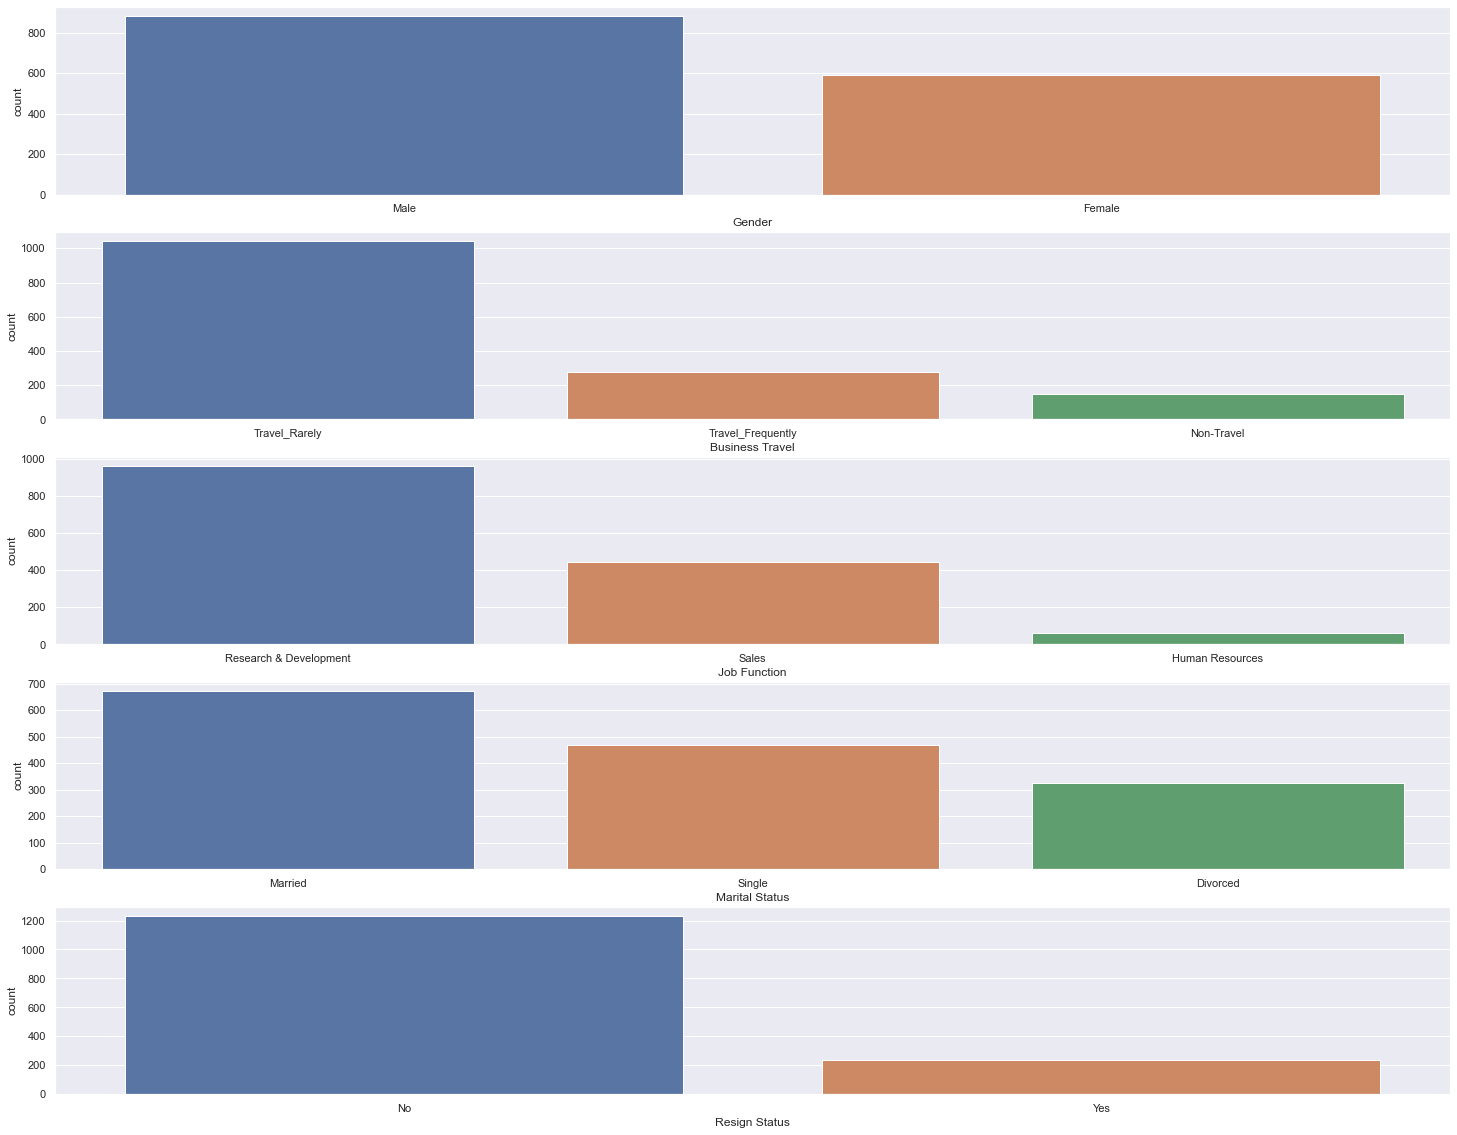

In [12]:
fig, ax = plt.subplots(5, 1, figsize=(25, 20))
i = 0
for col in ['Gender', 'Business Travel', 'Job Function', 'Marital Status', 'Resign Status']:
    sns.countplot(x=col, data=dfEDA, order = dfEDA[col].value_counts().index, ax=ax[i])
    i += 1
    print(dfEDA[col].value_counts())
    print('------------------------------------')

From the correlation plot, the more significant correlations are the correlations between: 
- <b>Age and Service (yrs)</b> with a correlation of <u>0.31</u>
- <b>Age and Salary ($)</b> with a correlation of <u>0.5</u>
- <b>Service (yrs) and Salary ($)</b> with a correlation of <u>0.51</u>

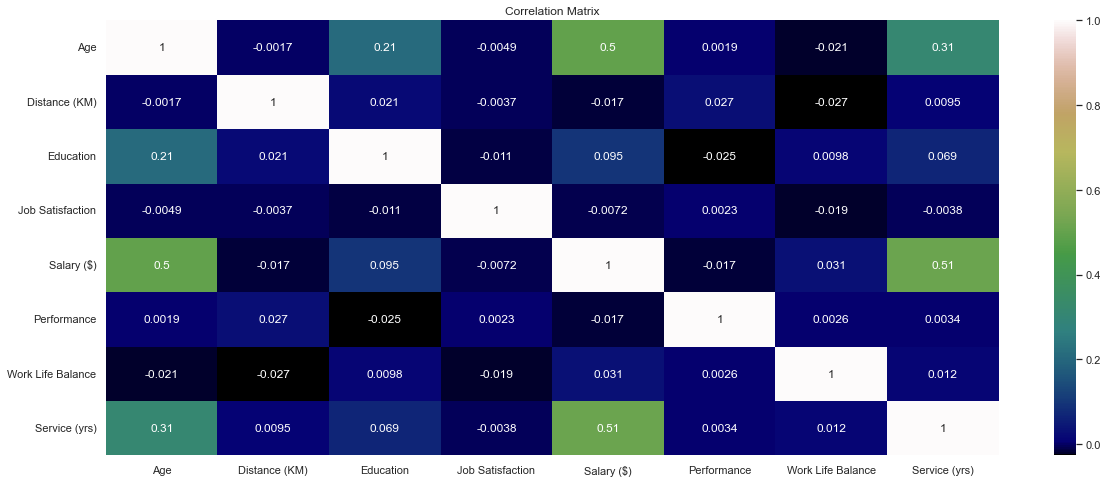

In [13]:
corr = dfEDA.corr()
sns.heatmap(corr, annot=True, cmap='gist_earth')
plt.title("Correlation Matrix")
plt.show()

# Preprocessing

Since some of the categorical features are still in numeric form, we have to convert the datatype first, before scaling the numerical features.

In [14]:
# Converting categorical features
df[['Education', 'Job Satisfaction', 'Performance', 'Work Life Balance']] = df[['Education', 'Job Satisfaction', 'Performance', 'Work Life Balance']].astype('O')

# Feature Engineering

The main objective of clustering is to assign objects into homogenous groups called clusters and at the same time making sure that objects in different groups are not similar. 

However, there might be a possibility that the data in this dataset have redundant information which means that there might be overlapping information after clustering the data. To prevent that, we have to do feature selection, otherwise known as dimension reduction. 

We cannot simply use conventional dimensional reduction techniques such as Principal Component Analysis (PCA) because our dataset consists of categprical features. So, we will be conduction tests such as Two-Sample t-Test and One-way Analysis of Variance (ANOVA).

![alt text](https://miro.medium.com/max/875/1*t5iKJocvAUgTIuwiD1qjPw.png 'Hypothesis Test') 

<b>Two-sample t-Test</b>

This test is to check if two population means are equal.

$$H_0 : \text{Population mean of both groups are equal} \\ H_1 : \text{Population mean of both groups are unequal}$$

Since `Gender`, `Performance` and `Resign Status` are the only features with two classes, we will conduct the Two-sample t-Test on those features.

We will be conducting the Two-sample t-Test on a significance level of 5%.

<u>Gender</u>

We can see that the variances for `Gender` are not very different hence, we can assume equal variances.

In [15]:
# Before conducting Two-sample t-Test, we have to check if variances are equal so we know whether to assume equal variances or not
df.groupby('Gender').var()

Age  Distance (KM)    Salary ($)  Service (yrs)
Gender                                                       
Female  85.860295      67.757837  2.204874e+07      36.052034
Male    81.763719      64.438521  2.222987e+07      38.509157

In [16]:
for col in df.select_dtypes('number').columns:
    pvalue = stats.ttest_ind(df[df['Gender']=='Male'][col], df[df['Gender']=='Female'][col], equal_var=True)[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of both groups are unequal\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of both groups are equal\n')

Age
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal

Salary ($)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal



<u>Performance</u>

We can see that the variances for `Performance` are quite different hence, we cannot assume equal variances.

In [17]:
# Before conducting Two-sample t-Test, we have to check if variances are equal so we know whether to assume equal variances or not
df.groupby('Performance').var()

Age  Distance (KM)    Salary ($)  Service (yrs)
Performance                                                       
3            82.810383      63.931487  2.223306e+07      38.264682
4            87.385408      75.585447  2.184418e+07      33.663343

In [18]:
for col in df.select_dtypes('number').columns:
    pvalue = stats.ttest_ind(df[df['Performance']==3][col], df[df['Performance']==4][col], equal_var=False)[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of both groups are unequal\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of both groups are equal\n')

Age
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal

Salary ($)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of both groups are equal



<u>Resign Status</u>

We can see that the variances for `Resign Status` are quite different hence, we cannot assume equal variances.

In [19]:
# Before conducting Two-sample t-Test, we have to check if variances are equal so we know whether to assume equal variances or not
df.groupby('Resign Status').var()

Age  Distance (KM)    Salary ($)  Service (yrs)
Resign Status                                                       
No             79.002944      64.202295  2.321513e+07      37.164851
Yes            93.883501      71.445183  1.325113e+07      35.402310

In [20]:
for col in df.select_dtypes('number').columns:
    pvalue = stats.ttest_ind(df[df['Resign Status']=='No'][col], df[df['Resign Status']=='Yes'][col], equal_var=False)[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of both groups are unequal\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of both groups are equal\n')

Age
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of both groups are unequal

Distance (KM)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of both groups are unequal

Salary ($)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of both groups are unequal

Service (yrs)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of both groups are unequal



<b>Two-sample t-Test summary</b>

Since we want there to be distinct information in the clusters, and we can see that the population means between male and female as well as employees with performance rating of 3 and 4 do not differ, we can say that `Gender` amd `Performance` do not have a huge influence on the distribution of data. Hence, we will drop the two columns based on the Two-sample t-Test.

On the other hand, for `Resign Status` we see that the population mean of both groups are unequal, this means that `Resign Status` has an influence on the distribution of data, hence we will keep it based on the Two-sample t-Test.
___

<b>One-way Analysis of Variance (ANOVA)</b>

This test is to verify if at least one of the population mean is unequal.

$$H_0 : \text{The population mean of all groups are equal} \\ H_1 : \text{The population mean of at least one group is different from the rest}$$

We will also be conducting the One-way ANOVA on a signifcance level of 5%.

In [21]:
def get_populations(col):
    populations = defaultdict()
    unique = df[col].unique()
    for cols in df.select_dtypes('number').columns:
        data = []
        for value in unique:
            data.append(df[df[col]==value][cols])
        populations[cols] = data

    return populations

<u>Education</u>

In [22]:
education = get_populations('Education')
for col in df.select_dtypes('number').columns:
    pvalue = stats.f_oneway(education[col][0], education[col][1], education[col][2], education[col][3])[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of all groups are equal\n')

Age
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Salary ($)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal



<u>Job Satisfaction</u>

In [23]:
satisfaction = get_populations('Job Satisfaction')
for col in df.select_dtypes('number').columns:
    pvalue = stats.f_oneway(satisfaction[col][0], satisfaction[col][1], satisfaction[col][2], satisfaction[col][3])[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of all groups are equal\n')

Age
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Salary ($)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal



<u>Work Life Balance</u>

In [24]:
worklife = get_populations('Work Life Balance')
for col in df.select_dtypes('number').columns:
    pvalue = stats.f_oneway(worklife[col][0], worklife[col][1], worklife[col][2], worklife[col][3])[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of all groups are equal\n')

Age
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Salary ($)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal



<u>Job Function</u>

In [25]:
job = get_populations('Job Function')
for col in df.select_dtypes('number').columns:
    pvalue = stats.f_oneway(job[col][0], job[col][1], job[col][2])[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of all groups are equal\n')

Age
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Salary ($)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal



<u>Business Travel</u>

In [26]:
business = get_populations('Business Travel')
for col in df.select_dtypes('number').columns:
    pvalue = stats.f_oneway(business[col][0], business[col][1], business[col][2])[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of all groups are equal\n')

Age
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Salary ($)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Service (yrs)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal



<u>Marital Status</u>

In [27]:
marital = get_populations('Marital Status')
for col in df.select_dtypes('number').columns:
    pvalue = stats.f_oneway(marital[col][0], marital[col][1], marital[col][2])[1]
    if pvalue < 0.05:
        print('\033[1m' + col + '\033[0m')
        print('P-value: less than 0.05')
        print('Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest\n')
    else:
        print('\033[1m' + col + '\033[0m')
        print('P-value: more than 0.05')
        print('Conclusion: Fail to reject null hypothesis, population mean of all groups are equal\n')

Age
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest

Distance (KM)
P-value: more than 0.05
Conclusion: Fail to reject null hypothesis, population mean of all groups are equal

Salary ($)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest

Service (yrs)
P-value: less than 0.05
Conclusion: Reject null hypothesis, population mean of at least one group is different from the rest



<b>ANOVA summary</b>

Similar to the objective of performing the Two-sample t-Test, we want to only keep the features that have an influence on the distribution of data (i.e. population mean of at least one group is different from the rest)

Features where population mean of all groups are equal (for all numerical features): 
1. Job Satisfaction
2. Work Life Balance
3. Business Travel

Features where population mean of at least one group is different from the rest (for at least one numerical feature): 
1. Education
2. Job Function
3. Marital Status

Hence, we will drop the features where population mean of all groups are equal (for all numerical features), namely, `Job Satisfaction`, `Work Life Balance` and `Business Travel` based on ANOVA.

In [28]:
# Drop columns as mentioned above where the population means are equal
df.drop(columns=['Gender', 'Performance', 'Job Satisfaction', 'Work Life Balance', 'Business Travel'], inplace=True)

# Further preprocessing

We will perform further preprocessing based on the results of the statistical tests (`Two-sample t-Test` and `Analysis of Variance (ANOVA)`).

Since the numerical features are not on the same scale, we will proceed to scale the data using `MinMaxScaler()`.

In [29]:
# Scaling numerical features as they are not on the same scale
minMaxScaleDf = df.copy()
scaler = MinMaxScaler()
minMaxScaleDf[minMaxScaleDf.select_dtypes(include='number').columns] = scaler.fit_transform(minMaxScaleDf[minMaxScaleDf.select_dtypes(include='number').columns])
categorical_columns = [1,3,4,7]

minMaxScaleDf

Age            Job Function  Distance (KM) Education  \
0     0.547619                   Sales       0.000000         2   
1     0.738095  Research & Development       0.250000         1   
2     0.452381  Research & Development       0.035714         2   
3     0.357143  Research & Development       0.071429         4   
4     0.214286  Research & Development       0.035714         1   
...        ...                     ...            ...       ...   
1465  0.428571  Research & Development       0.785714         2   
1466  0.500000  Research & Development       0.178571         1   
1467  0.214286  Research & Development       0.107143         3   
1468  0.738095                   Sales       0.035714         3   
1469  0.380952  Research & Development       0.250000         3   

     Marital Status  Salary ($)  Service (yrs) Resign Status  
0            Single    0.262454          0.150           Yes  
1           Married    0.217009          0.250            No  
2            Single    0.056925          0.000           Yes  
3           Married    0.100053          0.200            No  
4           Married    0.129489          0.050            No  
...             ...         ...            ...           ...  
1465        Married    0.082254          0.125            No  
1466        Married    0.472986          0.175            No  
1467        Married    0.270300          0.150            No  
1468        Married    0.230700          0.225            No  
1469        Married    0.178778          0.100            No  

[1470 rows x 8 columns]

# Modelling

<b>Algorithms</b>

There are two approaches I would like to consider for this clustering task: 
1. Use `K-Prototypes` algorithm to handle both numerical and categorical features for clustering 
2. Use certain clustering algorithms (explained below) that are meant for numerical features <b>but</b> on <u>Gower's Distance</u>

So, what is Gower's Distance?
- Gower's Distance is calculated as the mean of partial dissimilarities across individuals 
- Can be used to measure how different two records are and these records can either be numerical or categorical which is extremely good for us since our dataset has a mix of categorical and numerical data

The formula for Gower's Distance goes by:

$$D_Gower(x_1,x_2) = 1-(\frac{1}{p}\sum_{j=1}^{p}s_j(x_1,x_2))$$

For the second approach, there are a few important factors to be considered:
- Data passed into the `gower_matrix()` function must be unsclaed as scaling is already part of the process of the function when calculating gower's distance 
- Only selected algorithms where fitting distance matrix is allowed can use gower's distance to fit to the model

This leaves us with the only options to use the following algorithms for the second approach: 
1. Spectral clustering
2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
3. Ordering Points To Identify the Clustering Structure (OPTICS)
4. Agglomerative clustering

We will cluster the using the different algorithms on their default parameters first.
___

<b>Metrics</b>

Silhouette Coefficent: 

$$s = \frac{b - a}{max(a,b)}$$

$$Where\;{a}\;refers\;to\;the\;cluster\;cohesion\;and\;{b}\;is\;the\;cluster\;separation$$

The range of silhouette score ranges between -1 and 1 where:
> 1: Clusters are well apart from each other and clearly distinguished.

> 0: Clusters are indifferent, or we can say that the distance between clusters is not significant.

> -1: Clusters are assigned in the wrong way.
___

<b>Visualization techniques for clusters</b>

Using Factor Analysis of Mixed Data (FAMD): 

What is FAMD?
- Factor Analysis of Miixed data (FAMD) is a dimension reduction technique but <b>not a method for feature selection</b> that analyses data with a combination of the conventional Principal Component Annalysis (PCA) and Multiple Correspondence Analysis (MCA) techniques. 
- FAMD will extract the most important features by several feature selection methods or component/factor analysis techniques to reduce the dimensionality for easy and accurate analysis of the factors

So what will we use FAMD for?
- We will use FAMD to visualize the clusters in a lower-dimensional space

Why did we choose to use FAMD?
- Handles a mixed data (i.e. both categorical and numerical)
- Conventional dimension reduction techniques like PCA <b>will not</b> work on this dataset because PCA cannot handle categorical features 

Important things to take not of while using FAMD: 
- Data fitted to FAMD <b>must</b> be unscaled as the class includes scaling already as part of the process 

In [30]:
# Setting the random state
randoms = np.random.RandomState(228)

# Creating gower's distance matrix of whole dataset
distance = gower_matrix(df)

<h3>Spectral Clustering</h3>

In [31]:
# Function to visualize silhouette scores and Spectral Clustering on a 3D plane
def spectralvisualization(unscaled, n_clusters=8, affinity='precomputed', n_init=10):

    warnings.filterwarnings('ignore')

    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(unscaled) + (n_clusters + 1) * 10])

    distance = gower_matrix(unscaled)

    spectral = SpectralClustering(n_clusters=n_clusters, random_state=randoms, affinity=affinity, n_init=n_init, n_jobs=-1)
    cluster_labels = spectral.fit_predict(distance)

    silhouette_avg = silhouette_score(distance, cluster_labels)
    sample_silhouette_values = silhouette_samples(distance, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6])

    plt.suptitle(f"Silhouette analysis for Spectral Clustering clustering with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")
    plt.show()

    famd = FAMD(n_components=3)
    sample_famd = famd.fit_transform(unscaled)

    dimensions = pd.DataFrame()
    dimensions['Cluster'] = cluster_labels
    dimensions['Dimension 1'] = sample_famd.iloc[:, 0]
    dimensions['Dimension 2'] = sample_famd.iloc[:, 1]
    dimensions['Dimension 3'] = sample_famd.iloc[:, 2]

    fig = px.scatter_3d(dimensions, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='Cluster', 
                        title=f'Visualizing Spectral Clustering with {n_clusters} clusters in 3D scatterplot')
    
    fig.show()

In [32]:
spectral = SpectralClustering(affinity='precomputed', random_state=randoms, n_jobs=-1)
spectral_clusters = spectral.fit_predict(distance)

spectraldf = df.copy()
spectraldf['Cluster'] = spectral_clusters

spectralSummary = spectraldf.select_dtypes('number').groupby('Cluster').mean()

for col in spectraldf.select_dtypes(exclude='number').columns:
    spectralSummary[col] = spectraldf.groupby('Cluster')[col].agg(pd.Series.mode)

count = list(spectraldf['Cluster'].value_counts())
count = [np.round((x/1470)*100, 1) for x in count]
spectralSummary['Cluster size (%)'] = count

spectralSummary

Age  Distance (KM)   Salary ($)  Service (yrs)  \
Cluster                                                         
0        37.402010       8.738693  6526.246231       6.567839   
1        37.241573       9.213483  6699.056180       6.814607   
2        37.067416       9.185393  6882.910112       7.129213   
3        36.403141       9.078534  6099.167539       6.460733   
4        35.312500       9.625000  6030.090909       6.693182   
5        38.564935       9.240260  6748.175325       7.681818   
6        36.638191       9.447236  6261.442211       6.738693   
7        36.974359       9.066667  6828.271795       8.087179   

                   Job Function  Education Marital Status Resign Status  \
Cluster                                                                   
0        Research & Development          3        Married            No   
1        Research & Development          3        Married            No   
2        Research & Development          3        Married            No   
3        Research & Development          3        Married            No   
4        Research & Development          3        Married            No   
5        Research & Development          3        Married            No   
6        Research & Development          3        Married            No   
7        Research & Development          3        Married            No   

         Cluster size (%)  
Cluster                    
0                    13.5  
1                    13.5  
2                    13.3  
3                    13.0  
4                    12.1  
5                    12.1  
6                    12.0  
7                    10.5

Insights:
- Clusters appear to be too similar
- Cannot tell which employee cluster is vulnerable to resignation
- An overall bad representation of clusters although cluster sizes are similar

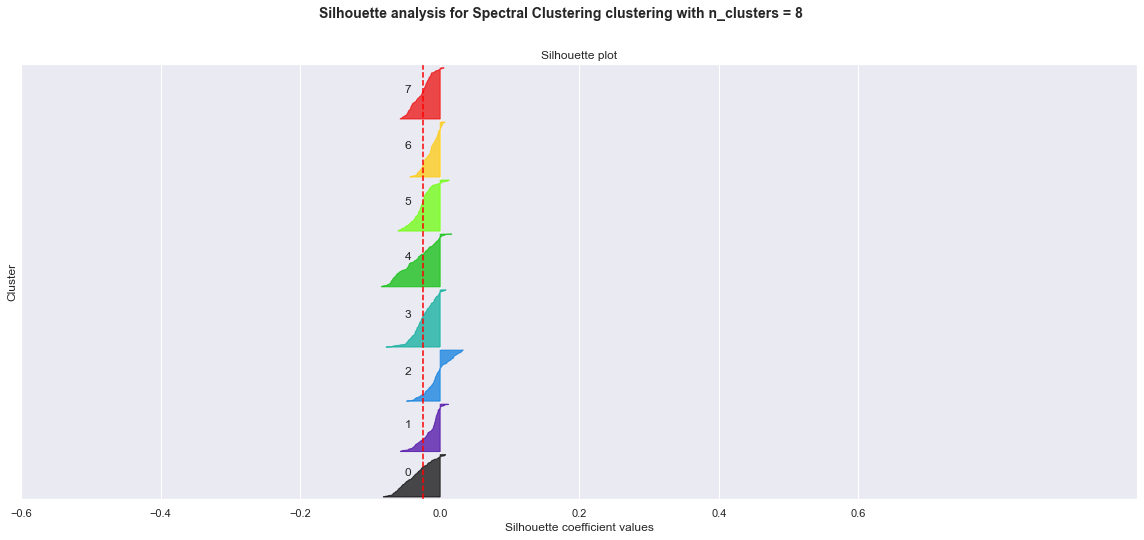

In [33]:
spectralvisualization(df)

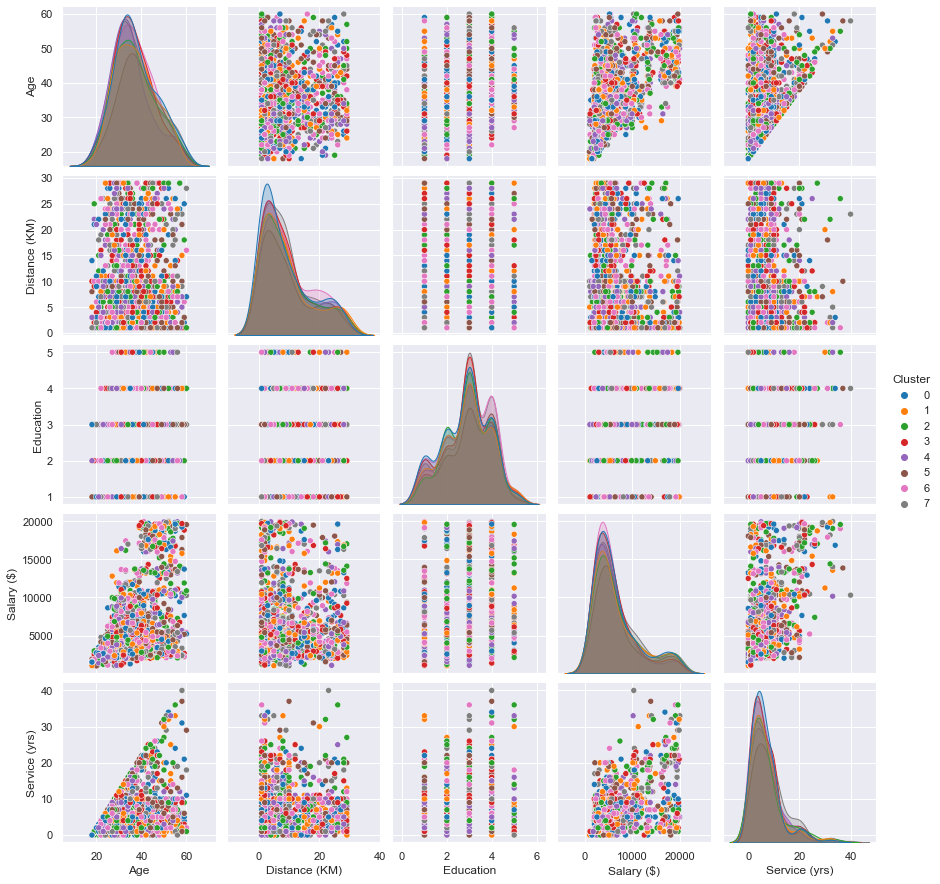

In [52]:
sns.pairplot(spectraldf, hue='Cluster', palette='tab10')
plt.show()

Insights:
- Average silhouette score is negative and close to zero, which indicates clusters are indifferent, distances between clusters are insignificant 
- From the scatterplot, it is impossible to see where each cluster is 
- We can also see from the distribution of data that each cluster generally has the same shape, which means the clusters have no difference
- Overall, using `Spectral Clustering` on default parameters does not do well at all at clustering the data

<h3>Agglomerative Clustering</h3>

In [34]:
# Function to visualize silhouette scores and Agglomerative Clustering clustering on a 2D plane
def agglomerativevisualization(unscaled, n_clusters=2, affinity='precomputed', linkage='complete'):

    warnings.filterwarnings('ignore')

    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(unscaled) + (n_clusters + 1) * 10])

    distance = gower_matrix(unscaled)

    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    cluster_labels = agglomerative.fit_predict(distance)

    silhouette_avg = silhouette_score(distance, cluster_labels)
    sample_silhouette_values = silhouette_samples(distance, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6])

    plt.suptitle(f"Silhouette analysis for Agglomerative Clustering clustering with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")
    plt.show()

    famd = FAMD(n_components=3)
    sample_famd = famd.fit_transform(unscaled)

    dimensions = pd.DataFrame()
    dimensions['Cluster'] = cluster_labels
    dimensions['Dimension 1'] = sample_famd.iloc[:, 0]
    dimensions['Dimension 2'] = sample_famd.iloc[:, 1]
    dimensions['Dimension 3'] = sample_famd.iloc[:, 2]

    fig = px.scatter_3d(dimensions, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='Cluster', 
                        title=f'Visualizing Agglomerative Clustering with {n_clusters} clusters in 3D scatterplot')
    
    fig.show()

    columns = unscaled.columns
    agglomerativedf = df[columns].copy()
    agglomerativedf['Cluster'] = cluster_labels

    agglomerativeSummary = agglomerativedf.select_dtypes('number').groupby('Cluster').mean()

    for col in agglomerativedf.select_dtypes(exclude='number').columns:
        agglomerativeSummary[col] = agglomerativedf.groupby('Cluster')[col].agg(pd.Series.mode)

    count = list(agglomerativedf['Cluster'].value_counts())
    count = [np.round((x/1470)*100, 1) for x in count]
    agglomerativeSummary['Cluster size (%)'] = count

    sns.pairplot(agglomerativedf, hue='Cluster', palette='tab10')
    plt.show()

    return agglomerativeSummary

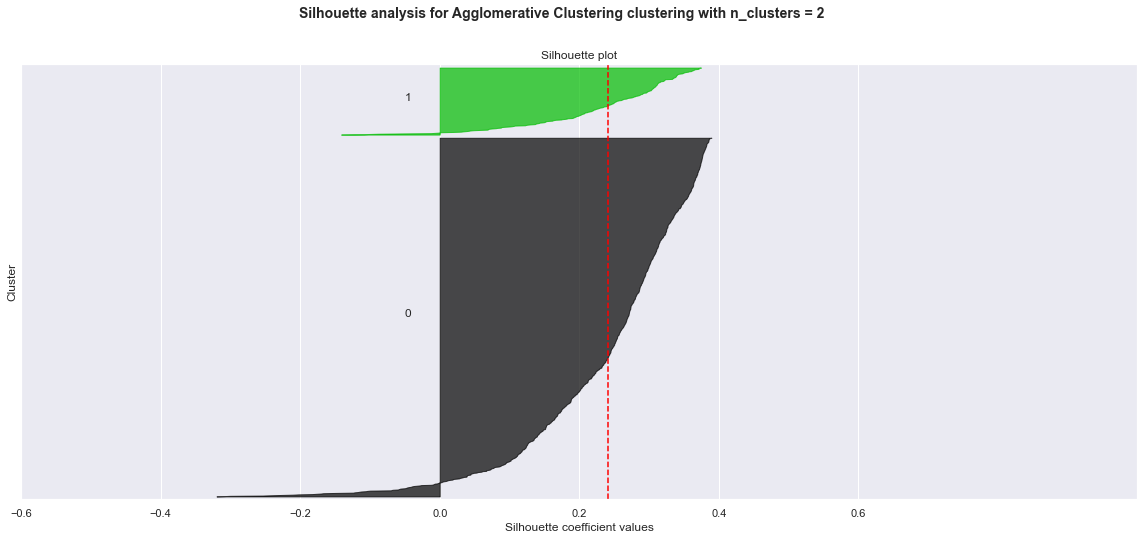

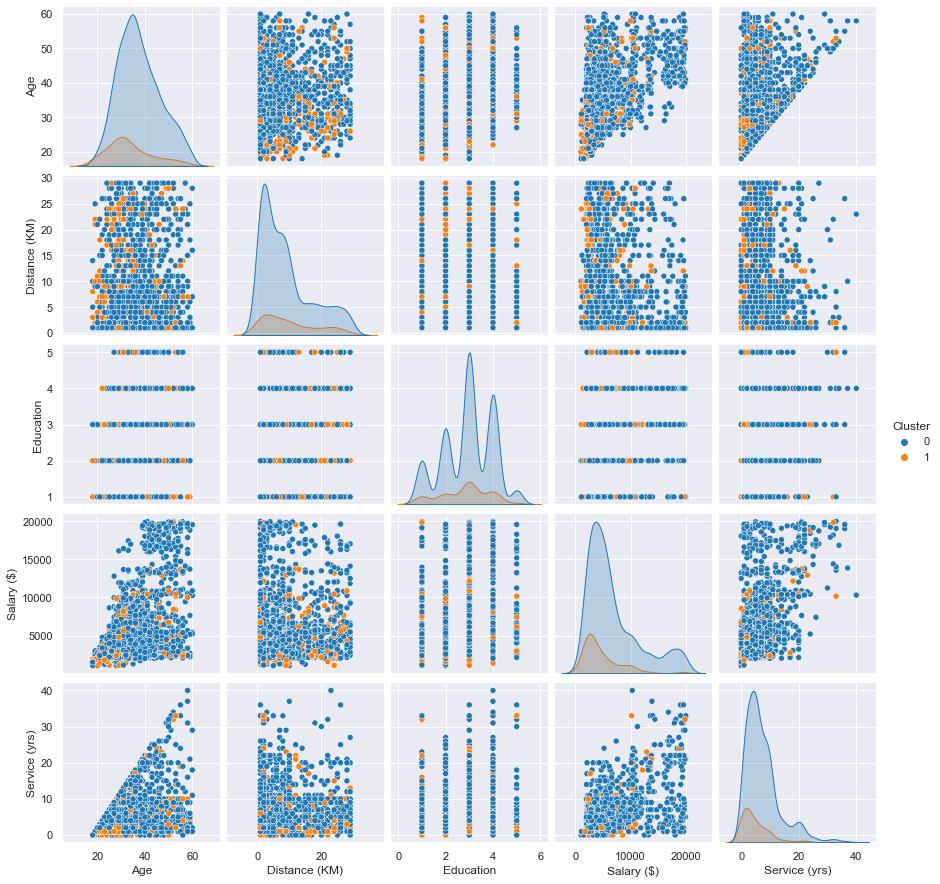

In [35]:
agglomerative_default_summary = agglomerativevisualization(df)

Insights:
- Silhouette plot shows that the average silhouette score is around 0.25 
- Both clusters appear to have some data points with negative silhouette scores, indicating that they could be wrongly clustered 
- Scatterplot shows clearly two distinct clusters that can be easily seen unlike `Spectral Clustering` but this could be also because there are only 2 clusters
- We see that generally for the 1st cluster, employees are younger, stay closer to the company, have a lower level of education, lower salary and have stayed in the company for less years

In [36]:
agglomerative_default_summary

Age  Distance (KM)   Salary ($)  Service (yrs)  \
Cluster                                                         
0        37.533118       8.997577  6838.357027       7.378837   
1        33.672414      10.232759  4713.030172       5.030172   

                   Job Function  Education Marital Status Resign Status  \
Cluster                                                                   
0        Research & Development          3        Married            No   
1        Research & Development          3         Single           Yes   

         Cluster size (%)  
Cluster                    
0                    84.2  
1                    15.8

Insights:
- Default parameters do not return equal cluster sizes but we see some variation in the cluster characteristics as compared to `Spectral Clustering` 
- However, these clusters could be essentially just 'grouping by resign status' 
- This can be improved later by choosing the optimal number of clusters during model improvement

<h3>K-Prototypes</h3>

In [37]:
# Function to visualize silhouette scores and K-Prototypes clustering on a 3D plane
def kprotovisualization(scaled, unscaled, categorical=categorical_columns, n_clusters=8, init='Cao', n_init=10, max_iter=100):

    warnings.filterwarnings('ignore')

    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(scaled) + (n_clusters + 1) * 10])

    distance = gower_matrix(unscaled)

    kproto = KPrototypes(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=randoms, n_jobs=-1)
    cluster_labels = kproto.fit_predict(scaled, categorical=categorical)

    silhouette_avg = silhouette_score(distance, cluster_labels)
    sample_silhouette_values = silhouette_samples(distance, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6])

    plt.suptitle(f"Silhouette analysis for K-Prototypes clustering with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")
    plt.show()

    famd = FAMD(n_components=3)
    sample_famd = famd.fit_transform(unscaled)

    dimensions = pd.DataFrame()
    dimensions['Cluster'] = cluster_labels
    dimensions['Dimension 1'] = sample_famd.iloc[:, 0]
    dimensions['Dimension 2'] = sample_famd.iloc[:, 1]
    dimensions['Dimension 3'] = sample_famd.iloc[:, 2]

    fig = px.scatter_3d(dimensions, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='Cluster', 
                        title=f'Visualizing K-Prototypes with {n_clusters} clusters in 3D scatterplot')
    
    fig.show()

    kprotodf = unscaled.copy()
    kprotodf['Cluster'] = cluster_labels

    kproto_Summary = kprotodf.select_dtypes('number').groupby('Cluster').mean()

    for col in kprotodf.select_dtypes(exclude='number').columns:
        kproto_Summary[col] = kprotodf.groupby('Cluster')[col].agg(pd.Series.mode)

    count = list(kprotodf['Cluster'].value_counts())
    count = [np.round((x/1470)*100, 1) for x in count]
    kproto_Summary['Cluster size (%)'] = count

    sns.pairplot(kprotodf, hue='Cluster', palette='tab10')
    plt.show()

    return kproto_Summary

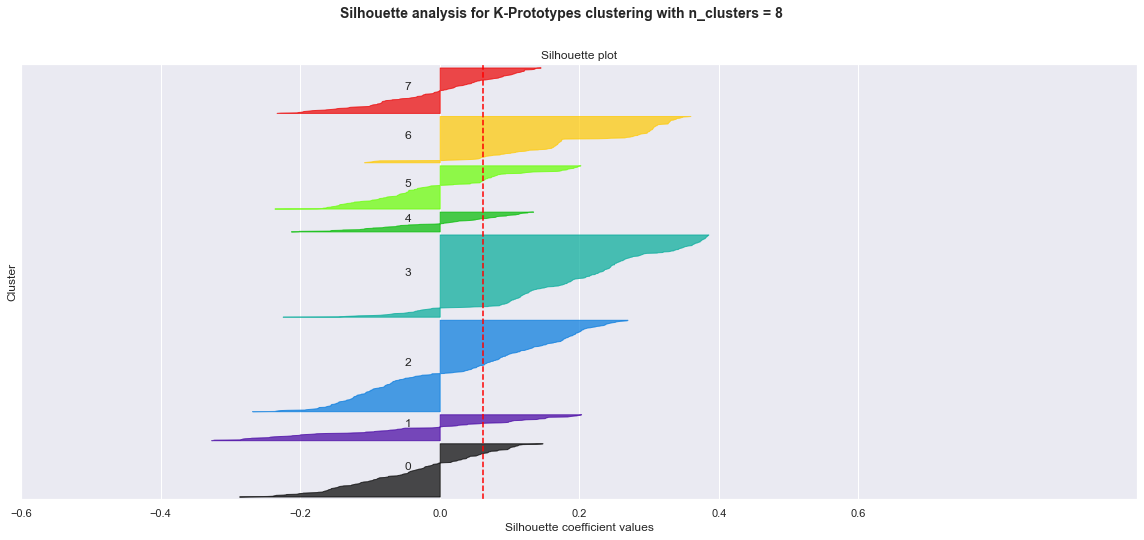

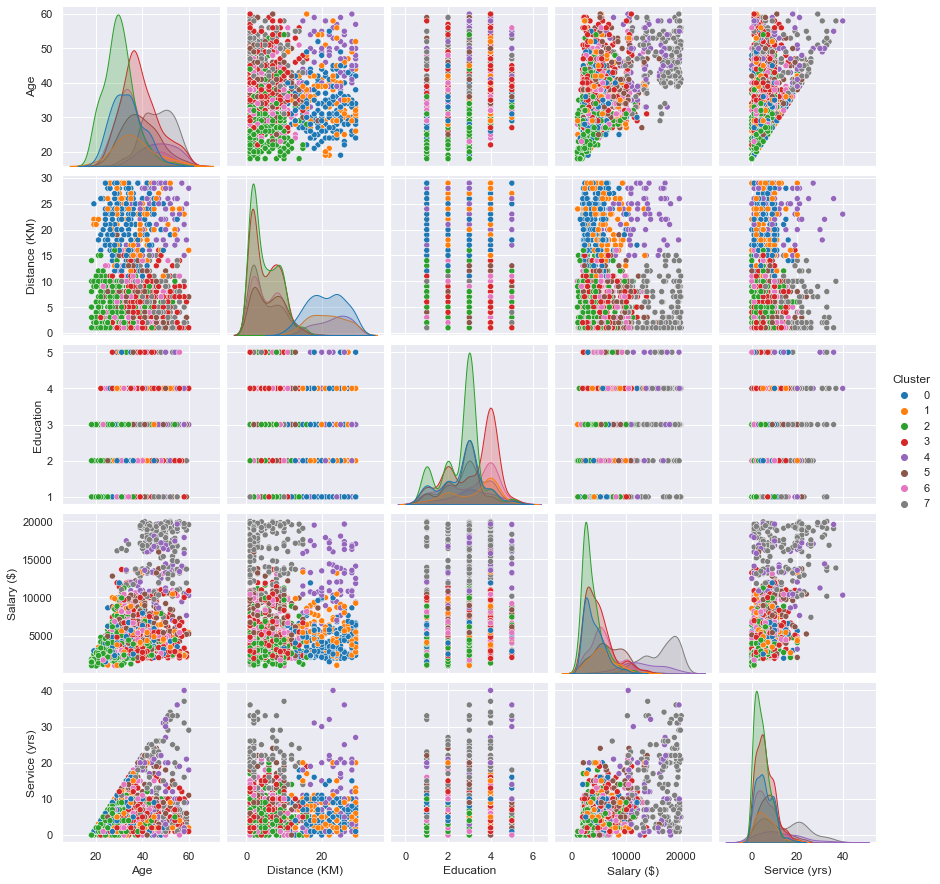

In [38]:
kproto_default_Summary = kprotovisualization(minMaxScaleDf, df)

Insights:
- Average silhouette score is close to zero, indicating clusters and indifferent
- For almost every cluster, half or most of the data points seem to have negative silhouette scores which indicates that the data might not be clustered correctly 
- We can see a slight separation in clusters from the 3D scatterplot with some overlapping of clusters

In [39]:
kproto_default_Summary

Age  Distance (KM)    Salary ($)  Service (yrs)  \
Cluster                                                          
0        33.375000      21.130208   4080.468750       5.552083   
1        36.617021      21.414894   5601.446809       6.138298   
2        29.914894       4.866261   3640.322188       4.328267   
3        38.956081       5.054054   4827.905405       5.898649   
4        47.305556      23.027778  12771.569444      12.430556   
5        39.115385       6.076923   6839.987179       7.974359   
6        35.047904       5.550898   5697.988024       6.173653   
7        46.914634       4.957317  16368.548780      14.140244   

                   Job Function  Education Marital Status Resign Status  \
Cluster                                                                   
0        Research & Development          3        Married            No   
1                         Sales          4         Single            No   
2        Research & Development          3         Single            No   
3        Research & Development          4        Married            No   
4        Research & Development          3        Married            No   
5                         Sales          3       Divorced            No   
6                         Sales          4        Married            No   
7        Research & Development          3        Married            No   

         Cluster size (%)  
Cluster                    
0                    22.4  
1                    20.1  
2                    13.1  
3                    11.4  
4                    11.2  
5                    10.6  
6                     6.4  
7                     4.9

Insights:
- From a first glance, clusters appear to have a lot of variation in characteristics 
- Cluster sizes are also considerably evenly spread out 
- Only arguable downside is that `Resign Status` feature indicates all 'No' which means all clusters represent employees who are still with the company, making it impossible to find the group of employees most vulnerable to resignation
- Generally decent clustering groups on K-Prototypes with default parameters, but model could be influenced by some noise which can be addressed later on in model improvement using feature selection

We can see that `Spectral Clustering` does not give us a nice visualization of clusters as the data points seem to be 'randomly scattered' and on top of that, the centroids of each cluster are extremely similar. Hence, I will not be including `Spectral Clustering` as part of the process of model improvement and will only use `Agglomerative Clustering` and `K-Prototypes`.

# Model Improvement

We can determine the optimal number of clusters by:
1. Plotting elbow plots 
2. Feature Selection
3. Using dendrogram to plot for Agglomerative Clustering (Hierarchical)

Steps `1` and `2` can be done together by plotting the elbow plots using different combinations of features.

We want to look out for two important factors to optimize our model from the elbow plot: 
1. The combinations of features that returns the least Clustering Costs 
2. Based on the best combination of features, we want to select the optimal number of clusters by looking at where the 'elbow' is positioned 

There might still be some noise that the model is learning from although we already removed the features that do not affect the distribution of data earlier based on the `Two-sample t-Test` and `Analysis of Variance (ANOVA)`. 

Hence, we will further select the most important features for clustering but we do not want to remove too many features. 

We will keep <b>6 of the 8</b> remaining features.
___

In [40]:
# Feature selection by trying out the unique combination of features
combinations = []
cat_cols = ['Job Function','Education','Marital Status','Resign Status']

for L in range(0, len(df.columns)+1):
    for subset in itertools.combinations(df.columns, L):
        if len(subset) == 6:
            combinations.append(list(subset))

<h3>Agglomerative Clustering</h3>

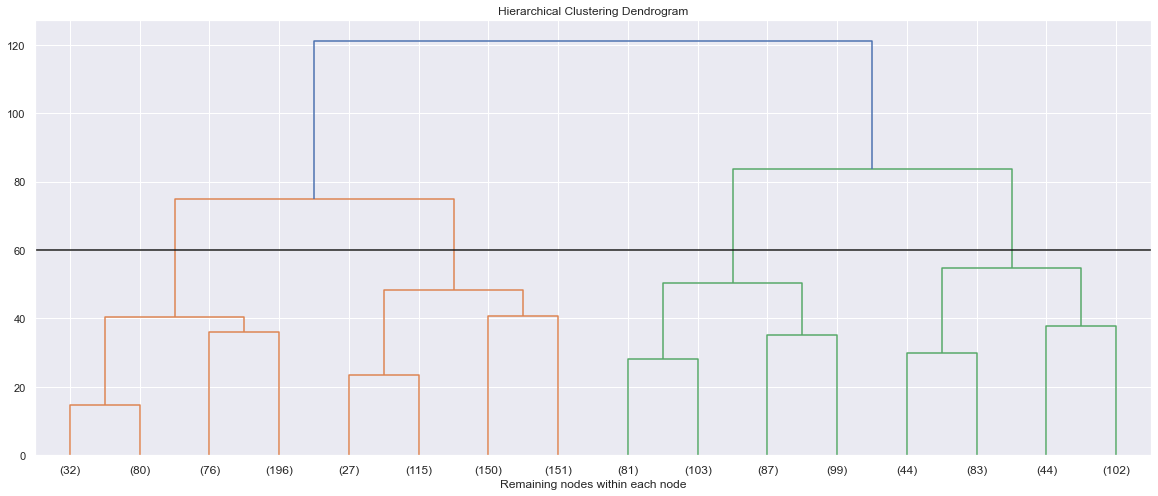

In [41]:
def plot_dendrogram(model, truncate_mode='level', p=3):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, truncate_mode=truncate_mode, p=p)

agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(distance)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglomerative)
plt.hlines(60, 0, 300, colors='k')
plt.xlabel('Remaining nodes within each node')
plt.show()

We determine the optimal number of clusters by drawing a horizontal line at the largest vertical distance where the line will not meet any separation of clusters and the number of clusters is the number of lines that goes through the horizontal line.

From the dendrogram above, the horizontal line should be <b>drawn around 60</b> and since <b>4 vertical lines</b> pass through the horizontal line, we can say that the <b>optimal number of clusters is 4</b>.

In [42]:
agglomerative_combinations = []
agglomerative_scores = []

for combi in combinations:
    
    distance = gower_matrix(df[combi])
    agglomerative = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete')
    cluster_labels = agglomerative.fit_predict(distance)

    agglomerative_combinations.append(tuple(combi))
    agglomerative_scores.append(silhouette_score(distance, cluster_labels))

scores = pd.DataFrame()
scores['Combination'] = agglomerative_combinations
scores['Average silhouette score'] = agglomerative_scores
scores.set_index('Combination', inplace=True)

scores.loc[scores['Average silhouette score'].nlargest(n=1).index]

Average silhouette score
Combination                                                                 
(Age, Job Function, Distance (KM), Salary ($), ...                  0.441496

The best combinations of 6 features that returns the best average silhouette score for Agglomerative Clustering (Hierarchical) is with features `Age`, `Job Function`, `Distance (KM)`, `Salary ($)`, `Service (yrs)`, `Resign Status`.

<u>4 clusters</u>

With features: `Age`, `Job Function`, `Distance (KM)`, `Salary ($)`, `Service (yrs)`, `Resign Status`

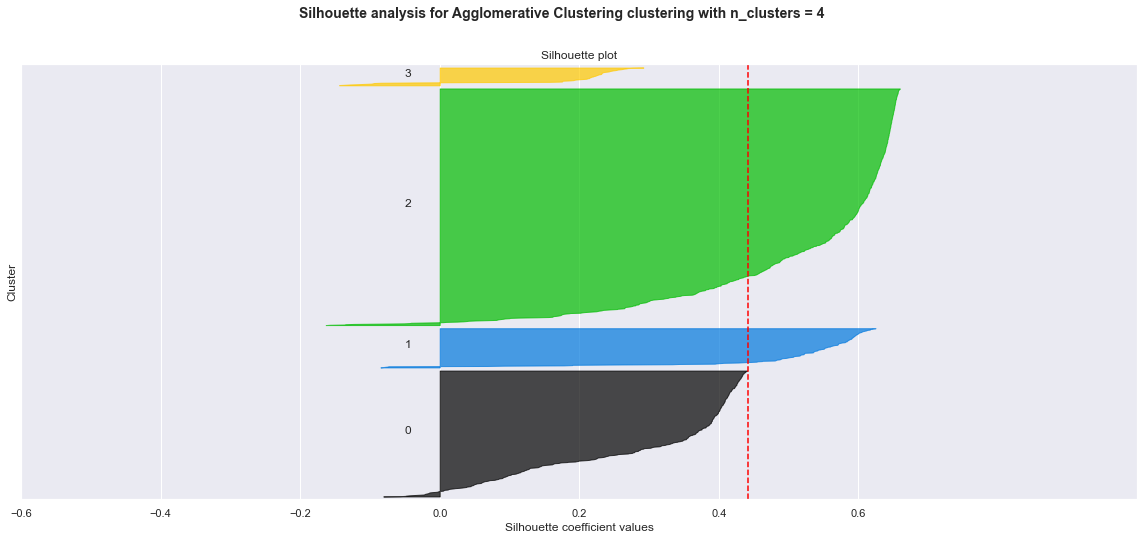

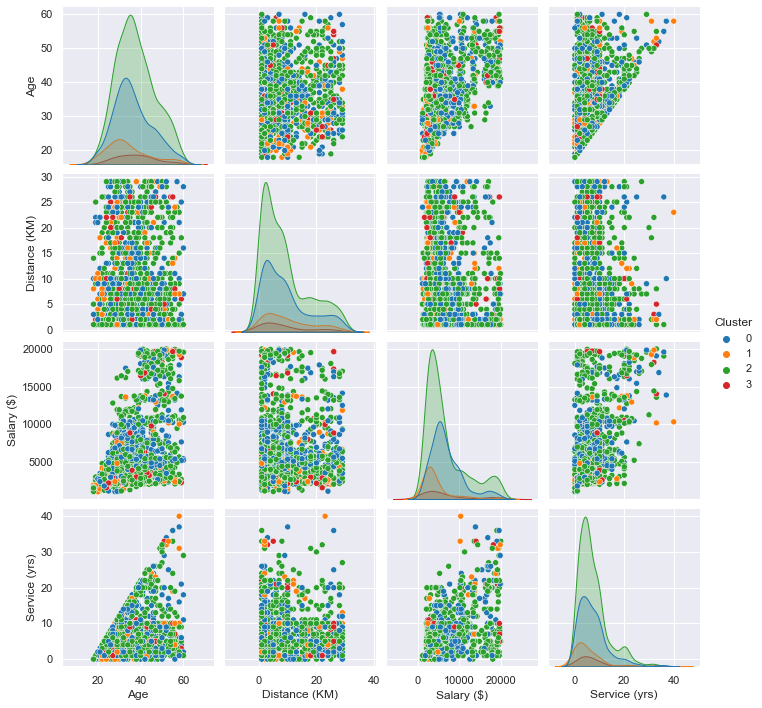

In [43]:
agglomerative_4clusters_Summary = agglomerativevisualization(df[['Age','Job Function','Distance (KM)','Salary ($)','Service (yrs)','Resign Status']], 
                                                            n_clusters=4)

Insights: 
- The average silhouette score is about 0.45 and very little data points from each cluster have negative silhouette score which indicates that clusters are moderately well distinguished 
- From the 3D scatterplot, the clusters can be clearly seen with no overlapping clusters
- From the pairplot we can see the distribution of numeric values are very distinct from one another which means the clusters are defined clearly 
- The scatter plots do not show a clear separation of clusters between the numeric features included

In [44]:
agglomerative_4clusters_Summary

Age  Distance (KM)   Salary ($)  Service (yrs)  \
Cluster                                                         
0        36.410431       9.385488  6858.804989       7.097506   
1        34.007246      10.166667  4532.115942       5.637681   
2        37.615942       8.964976  6630.326087       7.171498   
3        37.809524       8.698413  6654.507937       7.238095   

                   Job Function Resign Status  Cluster size (%)  
Cluster                                                          
0                         Sales            No              56.3  
1        Research & Development           Yes              30.0  
2        Research & Development            No               9.4  
3               Human Resources            No               4.3

Insights: 
- Using the optimal number of clusters and best combination of features, we were able to get a decent variation of characteristics for each cluster 
- However, one downside is still that the cluster sizes are not very even with the 0th cluster dominating as it represents 56.3% of the total data
- Overall, it is an improvement from using the default parameters of the `Agglomerative Clustering` algorithm

<h3>K-Prototypes</h3>

100%|██████████| 28/28 [06:28<00:00, 13.88s/it]


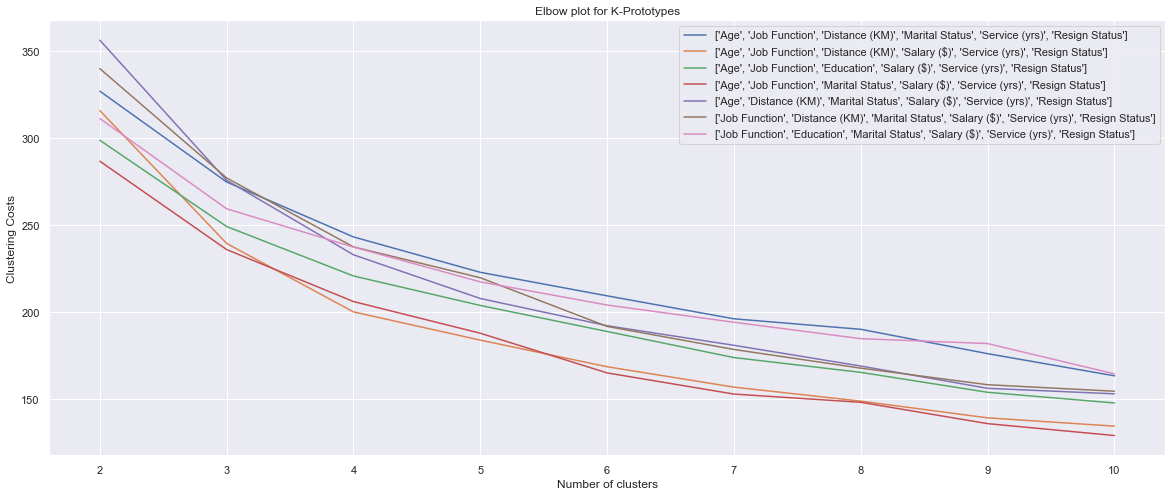

In [45]:
# Plotting the elbow plot
for combi in tqdm(combinations):

    costs = []
    n_clusters = []
    categorical = []

    for col in cat_cols:
        if col in combi:
            categorical.append(combi.index(col))
            
    for i in range(2,11,1):
        kproto = KPrototypes(n_clusters= i, random_state=randoms, n_jobs=-1)
        clusters = kproto.fit_predict(minMaxScaleDf[combi], categorical=categorical)
        costs.append(kproto.cost_)
        n_clusters.append(i)
    
    # Because of the high cardinality of combinations, we will only plot the best few combinations for easier readibility
    if np.mean(costs) < 225:
        plt.plot(n_clusters, costs, label=combi)

plt.xticks(np.arange(2,11,1))
plt.ylabel('Clustering Costs')
plt.xlabel('Number of clusters')
plt.title('Elbow plot for K-Prototypes')
plt.legend()
plt.show()

The best combinations of 6 features that returns the lowest average clustering costs at 4 clusters is with features `Age`, `Job Function`, `Distance (KM)`, `Salary ($)`, `Service (yrs)`, `Resign Status`.

The best combinations of 6 features that returns the lowest average clustering costs at 6 clusters is with features `Age`, `Job Function`, `Marital Status`, `Salary ($)`, `Service (yrs)`, `Resign Status`.

<u>4 clusters</u>

With features: `Age`, `Job Function`, `Distance (KM)`, `Salary ($)`, `Service (yrs)`, `Resign Status`

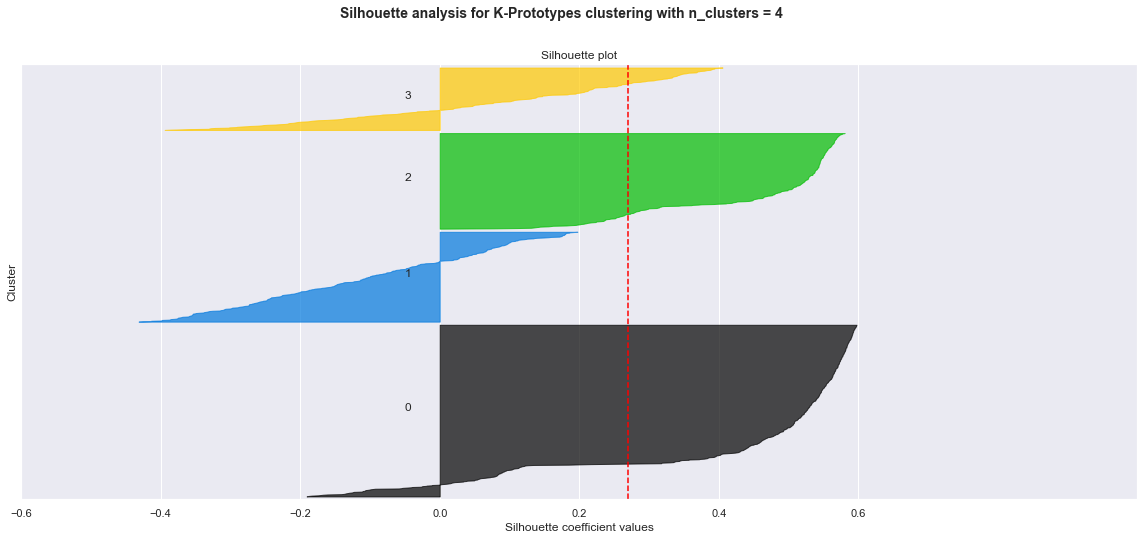

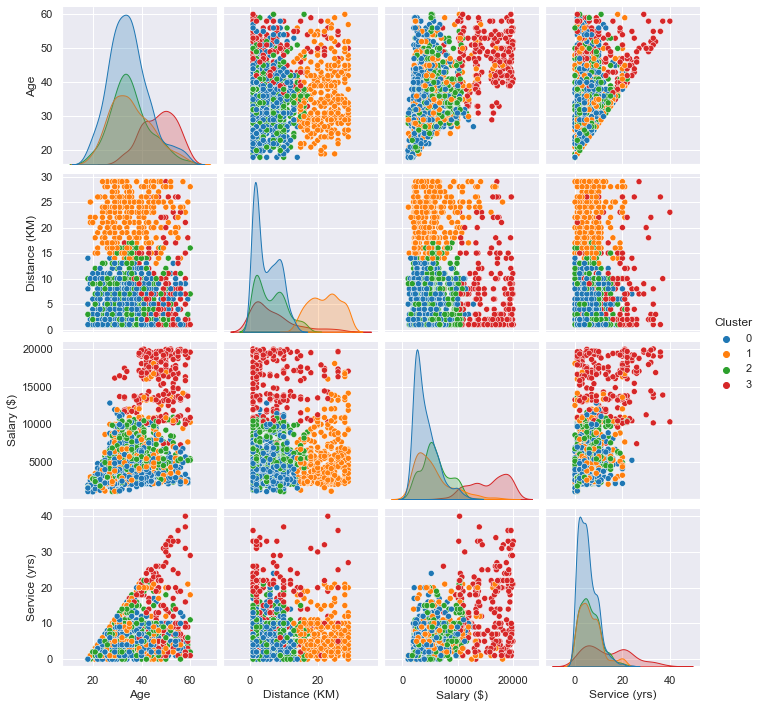

In [46]:
kproto_4clusters_Summary = kprotovisualization(minMaxScaleDf[['Age','Job Function','Distance (KM)','Salary ($)','Service (yrs)','Resign Status']], 
                                            df[['Age','Job Function','Distance (KM)','Salary ($)','Service (yrs)','Resign Status']], 
                                            n_clusters=4, categorical=[1,5])

Insights: 
- The average silhouette coefficient is around 0.3 
- The 0th and 1st cluster have little data points that have negative silhouette scores but for the 1st and 3rd clusters, there is a significant amount of data points that might be wrongly clustered 
- The 3D scatter plot shows that there are some overlapping in the clusters especially for the 3rd cluster
- We see that for Age, Salary ($) and Service (yrs), the 1st and 2nd clusters seem to have a same distribution which explains in the scatterplot why the data points were clustered together 
- This means that the 1st and 2nd clusters are not very different from each other

In [47]:
kproto_4clusters_Summary

Age  Distance (KM)    Salary ($)  Service (yrs)  \
Cluster                                                          
0        34.668885       4.928453   4133.567388       5.194676   
1        35.806349      22.073016   5397.695238       6.349206   
2        35.397015       6.173134   5820.808955       6.283582   
3        47.054795       6.986301  15638.310502      14.041096   

                   Job Function Resign Status  Cluster size (%)  
Cluster                                                          
0        Research & Development            No              40.9  
1        Research & Development            No              22.8  
2                         Sales            No              21.4  
3        Research & Development            No              14.9

Insights: 
- We can see that there is also a good variation of characteristics of the clusters but the 0th cluster is dominating the cluster size with 40.9% 
- However, all the clusters show that the resign status is 'No' which means that none of the clusters are vulnerable to resignation, which is not what we want to find 
- Overall, `K-Prototypes` with 4 clusters and selected features perform not bad but not ideal or as well as `Agglomerative Clustering` with 4 clusters and selected features

<u>6 clusters</u>

With features: `Age`, `Job Function`, `Marital Status`, `Salary ($)`, `Service (yrs)`, `Resign Status`

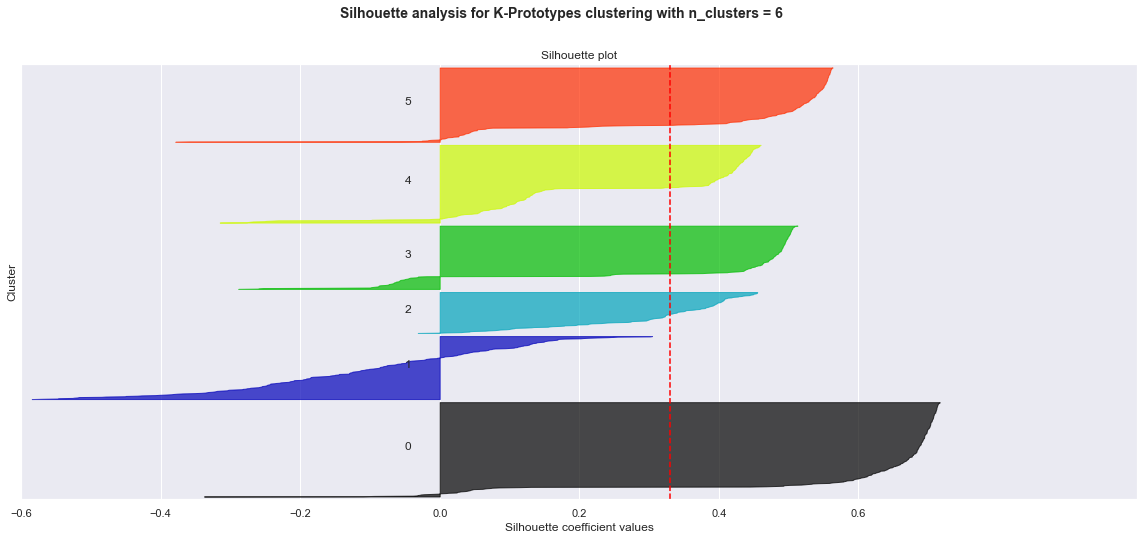

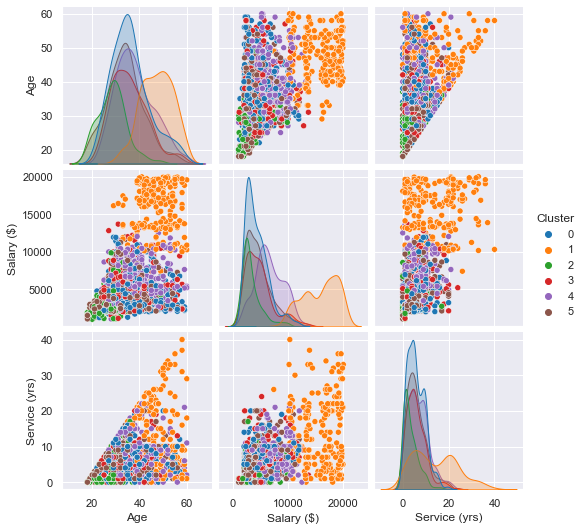

In [48]:
kproto_6clusters_Summary = kprotovisualization(minMaxScaleDf[['Age','Job Function','Marital Status','Salary ($)','Service (yrs)','Resign Status']], 
                                            df[['Age','Job Function','Marital Status','Salary ($)','Service (yrs)','Resign Status']], 
                                            n_clusters=6, categorical=[1,2,5])

Insights: 
- Average silhouette score is around 0.35
- All of the clusters except the 1st cluster have close to no data points where the silhouette score is negative indicating that the data is generally well clustered and clusters are significant 
- More than half of the data points in the 1st cluster have negative silhouette scores which means that the data points of that cluster could be assigned the wrong way 
- The 3D scatterplot shows that some parts of the 1st, 4th and 5th cluster are overlapping in three dimensions
- Pairplot shows that the distribution for the numerical features are different for all the clusters which is good which means that the clusters are different

In [49]:
kproto_6clusters_Summary

Age    Salary ($)  Service (yrs)            Job Function  \
Cluster                                                                   
0        36.095522   4321.653731       5.719403  Research & Development   
1        47.285714  15749.535714      14.026786  Research & Development   
2        28.513699   3302.869863       3.465753  Research & Development   
3        35.657778   4764.484444       5.840000  Research & Development   
4        37.916667   6597.076087       6.789855                   Sales   
5        33.875000   4578.174242       5.871212  Research & Development   

        Marital Status Resign Status  Cluster size (%)  
Cluster                                                 
0              Married            No              22.8  
1              Married            No              18.8  
2               Single           Yes              18.0  
3             Divorced            No              15.3  
4              Married            No              15.2  
5               Single            No               9.9

Insights: 
- We can see that the characteristics of each cluster are very well-defined in terms of having different characteristics for each cluster 
- Furthermore, the cluster sizes are very well distributed 
- We also managed to get a 'Yes' cluster for resign status even though the data was extremely imbalanced favouring 'No' 
- Now, we are able to single out the group of employees who are still with their companies and we can analyse the clusters where resign status is 'Yes', indicating that they are no longer with the company
- It is also a very big improvement from using `K-Prototypes` on default parameters
- Overall, `K-Prototypes` with 6 clusters and selected features gives us significant and insightful clusters 

Hence, I will be selecting it as my final model.

# Final Model

We will be selecting our final model to be K-Prototypes with 6 clusters. 

Features included in the model: `Age`, `Job Function`, `Marital Status`, `Salary ($)`, `Service (yrs)` and `Resign Status`

I chose K-Prototypes over Agglomerative Clustering in the end because although Aggloremative Clustering returned a good of a variation of characteristic with distinct clusters it was still not as good as K-Prototypes and the cluster sizes were uneven.

In [50]:
kproto_6clusters_Summary

Age    Salary ($)  Service (yrs)            Job Function  \
Cluster                                                                   
0        36.095522   4321.653731       5.719403  Research & Development   
1        47.285714  15749.535714      14.026786  Research & Development   
2        28.513699   3302.869863       3.465753  Research & Development   
3        35.657778   4764.484444       5.840000  Research & Development   
4        37.916667   6597.076087       6.789855                   Sales   
5        33.875000   4578.174242       5.871212  Research & Development   

        Marital Status Resign Status  Cluster size (%)  
Cluster                                                 
0              Married            No              22.8  
1              Married            No              18.8  
2               Single           Yes              18.0  
3             Divorced            No              15.3  
4              Married            No              15.2  
5               Single            No               9.9

<b>Analysis of the final clusters</b>

0th Cluster: 
> <b>Persona name: Average PMET Alan</b> 

> This cluster represents the employees who are married matured adults who have worked around 5 years and it is probably not their first job considering their age of 36. The resign status indicates that they most of the employees from this cluster do not resign, hence this group is not the group of employees that are most vulnerable to resignation.

1st Cluster: 
> <b>Persona name: Family Man Melvin</b> 

> This cluster represents the employees who are middle-aged and are married. The employees in this cluster have long service for their company as their average years worked in the company is 14 years which can explain their high pay of around $16,000 as they can rise in status over the years. Most of the employees from this cluster do not resign, hence this group is not the group of employees that are most vulnerable to resignation.

2nd Cluster (<i>Most vulnerable to resignation</i>): 
> <b>Persona name: Job Hopper Harry</b> 

> This cluster represents the employees who are young adults and single who are probably still job hopping (given the amount of years worked in the company is only 3 years) in search of a more suitable or higher pay job for themselves. This could be because they might want to have more income and achieve financial stability early to live a lavish lifestyle in the future. This group of employees are the most vulnerable to resignation as we see that most of the employees in this cluster are no longer with the company.

3rd Cluster: 
> <b>Persona name: Sad PMET Sally</b> 

> This cluster and the 0th cluster have similar characteristics with the only different in marital status where most employees in this cluster are divorced. The employees in this cluster find no success in their marriage life. This group of employees are not the most vulnerable to resignation as we see that most of the employees in this cluster have not resign and are still with the company.

4th Cluster: 
> <b>Persona name: Money Catcher Celine</b> 

> This cluster represents the employees who are married matured adults who work in sales and their income is probably based on the commisions/incentives from their sales as they have a pretty good average salary of arounf $6,500. This group of employees are also not the most vulnerable to resignation as we see that most of the employees in this cluster tend to not resign.

5th Cluster: 
> <b>Persona name: Corporate Ladder Lenny</b> 

> This cluster represents the employees who are single and in their prime age. They are probably result-oriented who focuses on their career and want to climb the corporate ladder. They are still near the bottom level of the ladder considering their average salary of $4,600 and 6 years in the company. Most of the employees from this cluster do not resign, hence this group is not the group of employees that are most vulnerable to resignation.

<b>Recommendations to retain the group of employees most vulnerable to resignation</b>

We have established that the most vulnerable groups of employees is the employees from the 2nd cluster:

| Age | Salary ($) | Service (yrs) | Job Function | Marital Status | Resign Status |
| ---    | ---   | ---   | ---  | ---  | ---  |
| 28.513699    | 3302.869863     | 3.465753    | Research & Development   | Single   | Yes   |

The company can take certain measures to retain this most vulnerable group of employees: 
> 1. Counter-offer the resignation and re-negotiate the terms and conditions of the employee's contract and provide themm with a better job prospect, for example pay increment

> 2. Offer the employee the idea of job rotation where it is flexible for the employee to take on a different task by changing to another departmment of interest

> 3. Ensure the employee has job security. Extend the term of the employee contract if they are afraid they would not be able to put food on the table

> 4. Assure them that there are chances of promotion in the near future as long as performance is delivered since they have been working in the company for over 3 years

# Conclusion

I have managed to establish a specific group of employees who are vulnerable to resignation and provided recommendations to counter the problem. I was able to do so thanks to using the subset of a wonderful process of machine learning, Clustering. 

I was enriched with the bountiful supply of knowledge that was bestowed upon me through this assignment as I managed to learn about various clustering algorithms such as K-Prototypes that is specifically for mixed data clustering. 

I hope to be able to further hone my skills on this sub-domain of machine learning and explore more of this wonderful process.

![alt text](https://img.freepik.com/premium-vector/cartoon-businessman-expressing-different-emotions_52569-518.jpg?w=2000 'Employee sad to happy')

# References

<b>Background Research</b>

[1] https://www.peoplekeep.com/blog/employee-retention-the-real-cost-of-losing-an-employee 

[2] https://hrmasia.com/the-cost-of-employee-turnover/#:~:text=The%20US%20Department%20of%20Labour,an%20annual%20salary%20of%20%2433%2C000 

<b>Additional Referencing Materials (Methodology)</b>

[3] https://www.imperva.com/blog/clustering-and-dimensionality-reduction-understanding-the-magic-behind-machine-learning/ 

[4] https://www.jmp.com/en_sg/statistics-knowledge-portal/t-test/two-sample-t-test.html 

[5] https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0 

[6] https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553 

[7] https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c 

[8] https://towardsdatascience.com/factor-analysis-of-mixed-data-5ad5ce98663c